In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

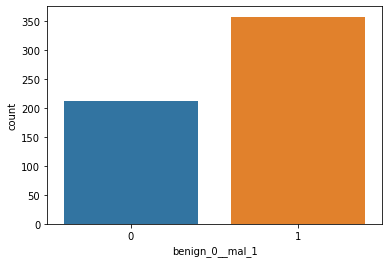

In [10]:
sns.countplot(x='benign_0__mal_1',data = df)

<AxesSubplot:>

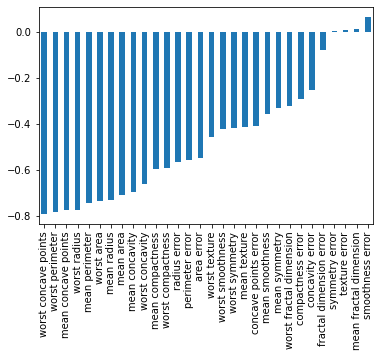

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

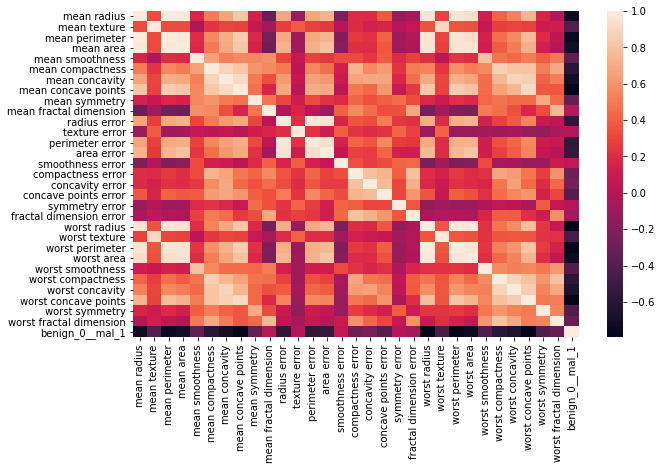

In [17]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

In [18]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Dropout

In [34]:
X_train.shape

(426, 30)

In [35]:
model = Sequential()

In [38]:
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')


In [39]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6874 - val_loss: 0.6783
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6683 - val_loss: 0.6659
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6554 - val_loss: 0.6538
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 0.6332
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6121 - val_loss: 0.5989
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5706 - val_loss: 0.5503
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5227 - val_loss: 0.5009
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4800 - val_loss: 0.4573
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4378 - val_loss: 0.4152
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4023 - val_loss: 0.3800
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0927
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0675
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0427 - val_loss: 0.0617
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.0593
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.1367
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.0532
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1049
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0466
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0305 - val_loss: 0.0623
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.2070
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0468
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0893
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0697
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0878
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0662
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0843
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0968
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0717
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0898
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0968
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 8.7035e-04 - val_loss: 0.1184
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 8.6408e-04 - val_loss: 0.1259
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 8.0761e-04 - val_loss: 0.1169
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 7.8956e-04 - val_loss: 0.1278
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 7.8228e-04 - val_loss: 0.1277
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 7.5608e-04 - val_loss: 0.1217
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 7.6626e-04 - val_loss: 0.1316
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 7.9158e-04 - val_loss: 0.1260
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 7.5643e-04 - val_loss: 0.1255
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 2.9463e-04 - val_loss: 0.1578
Epoch 324/600
14/14 [==============================] - 0s 2ms/step - loss: 2.5203e-04 - val_loss: 0.1466
Epoch 325/600
14/14 [==============================] - 0s 2ms/step - loss: 2.5425e-04 - val_loss: 0.1510
Epoch 326/600
14/14 [==============================] - 0s 2ms/step - loss: 2.4858e-04 - val_loss: 0.1526
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 2.4178e-04 - val_loss: 0.1494
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 2.4163e-04 - val_loss: 0.1507
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 2.4033e-04 - val_loss: 0.1541
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 2.3770e-04 - val_loss: 0.1480
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 2.3167e-04 - val_loss: 0.1564
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 1.1243e-04 - val_loss: 0.1774
Epoch 402/600
14/14 [==============================] - 0s 3ms/step - loss: 1.1029e-04 - val_loss: 0.1709
Epoch 403/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0498e-04 - val_loss: 0.1696
Epoch 404/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0293e-04 - val_loss: 0.1730
Epoch 405/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0399e-04 - val_loss: 0.1693
Epoch 406/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0464e-04 - val_loss: 0.1789
Epoch 407/600
14/14 [==============================] - 0s 2ms/step - loss: 9.9782e-05 - val_loss: 0.1693
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0098e-04 - val_loss: 0.1704
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0711e-04 - val_loss: 0.1810
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 4.8190e-05 - val_loss: 0.1892
Epoch 480/600
14/14 [==============================] - 0s 2ms/step - loss: 4.7906e-05 - val_loss: 0.1880
Epoch 481/600
14/14 [==============================] - 0s 2ms/step - loss: 4.7663e-05 - val_loss: 0.1837
Epoch 482/600
14/14 [==============================] - 0s 2ms/step - loss: 4.6685e-05 - val_loss: 0.1887
Epoch 483/600
14/14 [==============================] - 0s 2ms/step - loss: 4.6846e-05 - val_loss: 0.1897
Epoch 484/600
14/14 [==============================] - 0s 2ms/step - loss: 4.5891e-05 - val_loss: 0.1870
Epoch 485/600
14/14 [==============================] - 0s 2ms/step - loss: 4.6523e-05 - val_loss: 0.1883
Epoch 486/600
14/14 [==============================] - 0s 2ms/step - loss: 4.4883e-05 - val_loss: 0.1875
Epoch 487/600
14/14 [==============================] - 0s 2ms/step - loss: 4.5003e-05 - val_loss: 0.1873
Epoch 488/600
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 2.3107e-05 - val_loss: 0.2009
Epoch 558/600
14/14 [==============================] - 0s 2ms/step - loss: 2.3198e-05 - val_loss: 0.2011
Epoch 559/600
14/14 [==============================] - 0s 2ms/step - loss: 2.2854e-05 - val_loss: 0.2063
Epoch 560/600
14/14 [==============================] - 0s 2ms/step - loss: 2.2637e-05 - val_loss: 0.2055
Epoch 561/600
14/14 [==============================] - 0s 2ms/step - loss: 2.2485e-05 - val_loss: 0.2039
Epoch 562/600
14/14 [==============================] - 0s 2ms/step - loss: 2.2824e-05 - val_loss: 0.2095
Epoch 563/600
14/14 [==============================] - 0s 2ms/step - loss: 2.1850e-05 - val_loss: 0.2035
Epoch 564/600
14/14 [==============================] - 0s 2ms/step - loss: 2.1785e-05 - val_loss: 0.2047
Epoch 565/600
14/14 [==============================] - 0s 2ms/step - loss: 2.1583e-05 - val_loss: 0.2046
Epoch 566/600
14/14 [==============================] - 0s 2ms/step - 

In [40]:
losses = pd.DataFrame(model.history.history)

In [41]:
losses

,loss,val_loss
0,0.687449,0.678297
1,0.668271,0.665906
2,0.655351,0.653785
3,0.639546,0.633164
4,0.612054,0.598871
...,...,...
595,0.000017,0.215908
596,0.000016,0.210431
597,0.000018,0.219424
598,0.000016,0.207974


<AxesSubplot:>

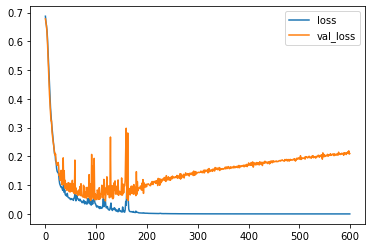

In [42]:
losses.plot()

In [43]:
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 25)

In [48]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test),
         callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7032 - val_loss: 0.6743
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6549 - val_loss: 0.6332
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6080 - val_loss: 0.5947
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5750 - val_loss: 0.5715
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5447 - val_loss: 0.5369
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5137 - val_loss: 0.5154
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4816 - val_loss: 0.4817
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4508 - val_loss: 0.4586
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4183 - val_loss: 0.4527
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4057 - val_loss: 0.4129
Epoch 11

In [49]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

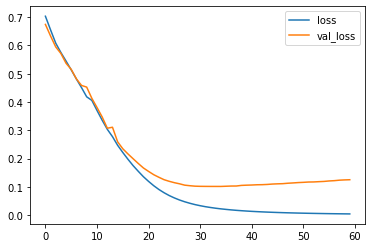

In [51]:
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [52]:
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.compile(loss='binary_crossentropy', optimizer = 'adam')


In [53]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test),
         callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 5.6096 - val_loss: 0.7371
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 5.6892 - val_loss: 0.7165
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 5.7261 - val_loss: 0.7118
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 5.7155 - val_loss: 0.7134
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 5.5398 - val_loss: 0.7151
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 5.3942 - val_loss: 0.7210
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 5.3047 - val_loss: 0.7295
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 5.4189 - val_loss: 0.7354
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 5.9606 - val_loss: 0.7619
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 5.7405 - val_loss: 0.8148
Epoch 11

In [54]:
model_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

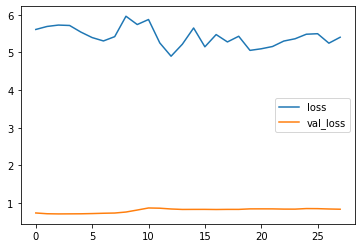

In [55]:
model_df.plot()